[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/demo_notebooks/3_nb_predictive_analytics.ipynb) 

# Chapter 3 - Foundations of predictive analytics
The lecture has introduced the standard data structure for predictive analytics. We need data with input variables and a **target variable**. The goal of predictive analytics is to derive a functional relationship between the input variables and the target. We assume that we can observe, measure, or control the input variables. Hence, our predictive model (the functional relationship between inputs and the target that we infer from past data), facilitates forecasting the expected value of the target variable based on the input variables. Whenever we observe a new case, we gather the values of the input variables for that case and feed them into our prediction model. Receiving that input, the model will produce a forecast of the target variable value for that case. So, predictive analytics is all about finding *good* **input-to-output mappings**. You can think of linear regression. Formally speaking, a linear regression function maps inputs $\boldsymbol x = {x_1, x_2, ..., x_d}$ from the domain $X \in  \mathbb{R}^d$ to the outputs $y \in  \mathbb{R}$. 

Recall from the lecture that many alternative terms are in use to refer to the input variables. Covariates, (independent) variables, attributes are only a few examples. In the interest of having consistent terminology, we will use the term **features** instead of input variables in the following. 

Here is the outline of today's demo notebook:
- Our first predictive model: linear regression
- The Boston Housing data set
- Data for classification 
- Synthetic data generation in `sklearn`

## Our first predictive model: linear regression
Linear regression assumes a linear additive relationship between features and the target. Specifically, we assume a model:
$$ y = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_m x_m + \epsilon $$
where $y$ is the target variable, $\beta$ denotes the regression coefficients (as usual), $x_j, j=1, ..., d$ are our features, and $\epsilon$ denotes the error term. Adopting the above perspective, when using linear regression, we assume we *know* the true functional form of the input-to-output mapping. Specifically, we assume this mapping to be linear and additive. Under this assumption, our task is to find the unknown parameters that characterize our mapping function, and these are the regression coefficients $\beta$. Some folks call models like linear regression **parametric models**. This is to emphasize that we assume to know the true functional form and then 'only' have to estimate that function's free parameters. Other methods like classification and regression trees work differently and are called **non-parametric models**. The form of such models (e.g., a classification tree) is not (assumed to be) known a priori. Rather, the task is to find that form; in other words determine it from the data.  

Questions for the experts: what are the free parameters in a tree model?

### Data generation

To warm-up, let's create some synthetic data for regression modeling. To keep things simple, we consider a univariate setting with only one feature. The classic example in business is that of a price response function, so we can assume that our single feature corresponds to the sales price of some product and our target to the sales of units of that product as some price.

In [1]:
# load relevant libraries

import random
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)  # stops Python from producing output in scientific notation

random.seed(888) # for reproducibility

In [2]:
n = 100 # dataset size

X = np.zeros(n) # initialize empty array

for i in range(0, n): # generate 100 numbers
  num = random.randint(20, 100) # will select integers randomly between 20 and 100
  X[i] = num # add integer to list X

X

array([ 30.,  75.,  94.,  76.,  83.,  69., 100.,  67.,  89.,  73.,  42.,
        70.,  68.,  75.,  54.,  68.,  89.,  21.,  94.,  87.,  67.,  70.,
        50.,  60.,  53.,  48.,  34.,  97.,  58.,  56.,  41.,  78.,  50.,
        45.,  97.,  49.,  25.,  91.,  46.,  86.,  82.,  21.,  29.,  77.,
        75.,  61.,  85.,  60.,  54.,  55.,  85.,  39.,  24.,  48.,  65.,
        70.,  69.,  83.,  46.,  47.,  87.,  59.,  55.,  36.,  28.,  62.,
        34.,  88.,  83.,  95.,  50.,  25.,  21.,  90.,  51.,  78.,  86.,
        29., 100.,  26.,  33.,  26.,  59.,  37.,  41.,  69.,  59.,  37.,
        56.,  61.,  51.,  24.,  63.,  34.,  59.,  28.,  34.,  33.,  31.,
        38.])

In case you are wondering: no, this was not the most efficient way to generate 100 random numbers between 20, and 100. Actually, it was not even *Python-style* programming. We are still new to Python. So we deliberately keep codes very simple and intuitive for now. You will see more elegant/advanced examples in later demo notebooks. For example, if you were to check NumPy's random functions, you will find `numpy.random.ranint()`, which allows an argument called `size` that allows users to produce an array of that length.

Next we need to create our target. Following the idea of linear regression, we create the target such that we set the regression parameters and claim these to be their *true values*, and then add some random noise. This is just 
$$ y = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_m x_m + \epsilon $$ 

in Python, where $\epsilon$ is our random error, the noise that our regression model cannot explain. 

Below, we assume that the true beta is $-0.5$ and that the true intercept, i.e., $\beta_0$, is 100. Sticking to the price response function example, an intercept of 100 implies that we would 'sell' 100 units of the product if we give it away for free. Note how we use Python to configure the noise. How would you describe our noise term?

In [3]:
y = np.zeros(n) # create array of 0s of the length X

true_beta = -0.5
true_intercept = 100

for i in range(0, n):
  num = true_beta*X[i] + np.random.normal(0, 5, 1) # for this relationship, the true beta_1 = 0.5. Randomness also added.
  y[i] = true_intercept + num # replace 0s in y with the transformed X value

y= np.around(y, 2) # round all values to 2 decimals

print(y)

[80.39 56.88 48.14 62.72 60.16 71.53 53.05 61.69 48.62 60.58 77.82 72.29
 63.06 61.   74.68 75.18 51.26 89.72 58.54 55.72 65.25 66.17 78.34 76.56
 67.15 70.59 85.18 47.2  71.73 69.47 76.06 60.53 75.62 76.5  47.49 74.89
 86.44 52.59 68.87 67.19 52.54 88.42 85.02 58.86 67.05 66.3  59.55 64.02
 62.72 71.26 55.53 77.15 91.66 82.   63.93 62.1  63.94 60.33 78.64 71.58
 49.84 68.98 78.21 86.   81.37 69.01 88.76 65.5  62.88 57.11 76.17 89.22
 94.22 52.47 74.02 63.36 49.8  77.72 46.51 84.7  79.39 82.92 59.21 78.37
 83.58 73.84 62.85 80.63 69.07 72.32 76.43 89.56 66.81 84.58 68.43 84.28
 81.77 84.87 80.06 79.72]


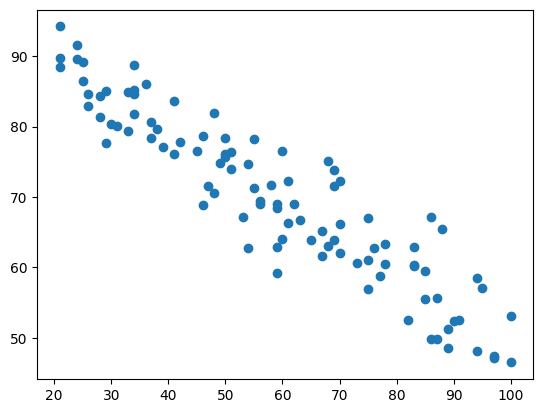

In [4]:
plt.scatter(X, y); # plot our X and y values on a scatterplot using pyplot

Don't forget to play with the data generation code before moving on ;)

Remember, this is the only way to make sure you really understand what is going on under the hood.

### Coefficient calculation

We know from our undergraduate studies how to compute our estimators $\hat \beta_0$ and $\hat \beta_1$ of the intercept and slope of our simple linear regression model, respectively. 

$$ \hat \beta_1 = \frac{\sum^{n}_{i=1}\left(x_i-\bar x \right) \left( y_i - \bar y\right)}{\sum^{n}_{i=1}\left(x_i-\bar x \right)^2} $$

$$ \hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

where $\bar x$ and $\bar y$ denote the mean price (feature) and sales (target), respectively. 

Let's try to code this from scratch. We can easily translate this formula into Python code to obtain the correct regression coefficients.

In [5]:
X_bar = np.mean(X)
y_bar = np.mean(y)

# recreate the beta hat 1 equation above:
denominator = numerator = 0 # initialize variables

for i in range(0,n):
  numerator += (X[i] - X_bar)*(y[i] - y_bar) # remember += means add the right hand side to the variable's value
  denominator += (X[i] - X_bar)**2
  beta_hat_1 = numerator / denominator

# recreate the beta hat 0 equation above:
beta_hat_0 = y_bar - beta_hat_1*X_bar

# check estimate values
print(beta_hat_0, beta_hat_1)

98.92941226022705 -0.49333183504486067


To more easily plot this line on a graph, let's calculate the value of `y` when `x = 100`. We already have the value of `y` when `x = 0`, which is $\beta_0$. After this, we can plot the data points and the line of best fit through the entire range of X.

In [6]:
y_val_x_at_100 = beta_hat_0 + beta_hat_1*100

print(y_val_x_at_100)

49.59622875574099


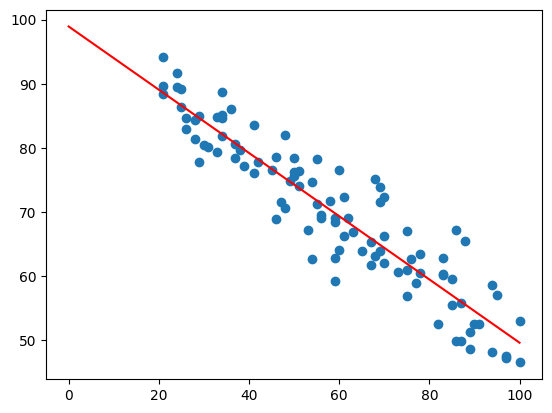

In [7]:
plt.scatter(X, y)
plt.plot([0, 100], [beta_hat_0, y_val_x_at_100],  color='red') # the first list are x coordinate values, the second are y values so this creates a line through (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

### Using sklearn to solve
All of the above can be quickly and efficiently done also through `sklean` to obtain the same result. To use `sklearn`, it is important to reshape the data so that it has two dimensions. If we check the shape of `X` and `y`, we will get `(100,)` for both of them. To reshape them to be one column, we can use: `.reshape(-1, 1)`. This will change the dimensions to `(100,1)`. Sounds confusing? True. Well, Python is powerful. Sometimes its behavior appears unnecessarily complicated. This is because Python designers had much more complex use cases in mind than those we consider here. For example, data can have more than two dimensions. Storing / handling high-dimensional data is nontrivial. Roughly speaking, this *odd reshaping thing* relates to the internal storage of data and how the storage approach is optimized for scalability. 

In [8]:
X = X.reshape(-1, 1) # reshapes array to a vertical column (originally the shape is (100,), we need it to be (100,1))
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [9]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X, y)

print(lin.intercept_, lin.coef_) # these values correspond to estimated beta 0 and estimated beta 1 respectively

[98.92941226] [[-0.49333184]]


Notice that the coefficients are the same when using sklearn and our self-coded version of regression. Of course they are.

### Predicting on new samples from the same population

Recall that the very point of predictive modeling is to forecast the value of the target variable for new cases. To demonstrate this, we can use the regression function just estimated, our model, and apply it to some novel data. We will first generate some new X values using the same random process and generate the corresponding y values using the same code. 

In [10]:
n_new = 10 # amount of new values to generate

X_new = np.random.randint(20, 100, size=n_new) # example using more efficient code to create a random array of integers

print(X_new)

[84 35 97 87 99 78 92 40 35 63]


In [11]:
y_true = np.zeros(n_new) # create array of 0s of the length X_new

for i in range(0, n_new):
  num = true_beta*X_new[i] + np.random.normal(0, 5, 1) # same relationship as before, true beta 1 is 0.5
  y_true[i] = true_intercept + num

y_true = np.around(y_true, 2) # round all values to 2 decimals

print(y_true)

[58.59 89.84 49.98 65.37 51.17 72.14 56.56 80.02 82.66 71.44]


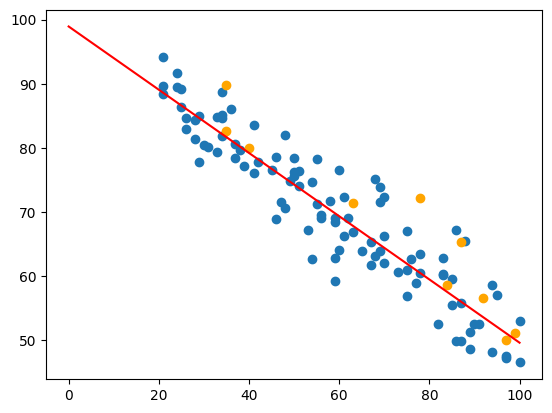

In [12]:
plt.scatter(X, y) # plot original points
plt.scatter(X_new, y_true, color='orange') # colour new points 
plt.plot([0, 100], [beta_hat_0, y_val_x_at_100], color='red') # pass line through coordinates (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

We can now use our coefficients to predict the value of y for each of the new X values. Afterwards, it is a good idea to check the residuals or errors from the prediction to ensure that we are getting consistent results. We can then aggregate these values, the residuals, to obtain a single measure of performance like mean square error or root mean square error.

In [13]:
# use our model to predict the y value for the new X values:
y_pred = np.zeros(n_new)

for i in range(0, n_new):
  y_pred[i] = beta_hat_0 + beta_hat_1*X_new[i]

print(y_pred)

[57.48953812 81.66279803 51.07622426 56.00954261 50.08956059 60.44952913
 53.54288344 79.19613886 81.66279803 67.84950665]


In [14]:
# calculate residuals:

res = y_true - y_pred

print(res)

[ 1.10046188  8.17720197 -1.09622426  9.36045739  1.08043941 11.69047087
  3.01711656  0.82386114  0.99720197  3.59049335]


In [15]:
# root mean squared error:

pred_error = np.sqrt(np.mean(res**2))

print("RMSE of our regression model is {:.4}".format(pred_error))

RMSE of our regression model is 5.643


### Predictions for Different Populations

Predictive analytics is based on the assumption that the data, which we observed in the past or gathered during business operations is representative for future data. Note how the previous example fulfills this assumption. 
We used the same mechanism or *data generation process* to simulate the old and the new data. To stress the importance of stable data generation processes, **let us simulate what would happen if our environment changes**. For example, people might get more price sensitive in a recession, so that a price-response relationship that was estimated on data from before the recession is no longer representative. Let's simulate such a situation using Python.

In [16]:
y_true_2 = np.zeros(n_new) # create array of 0s of the length X_new

true_beta_recession = -0.75

for i in range(0, n_new):
  num = true_beta_recession*X_new[i] + np.random.normal(0, 5, 1) # altered relationship, now the true beta_1 is 0.25 instead of 0.5
  y_true_2[i] = true_intercept + num

y_true_2 = np.around(y_true_2, 2) # round all values to 2 decimals

print(y_true_2)

[44.89 72.4  27.92 36.61 25.45 42.91 35.18 69.33 77.14 50.08]


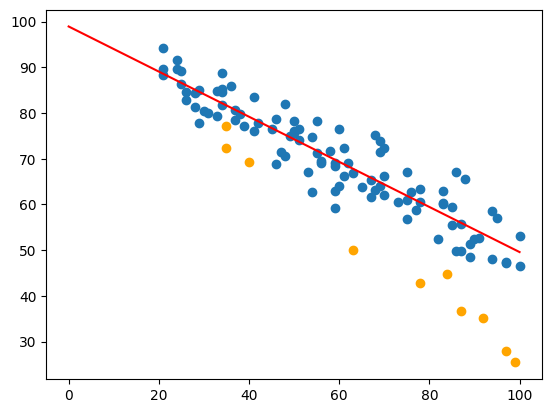

In [17]:
plt.scatter(X, y) # plot old points
plt.scatter(X_new, y_true_2, color='orange') # colour new points 
plt.plot([0,100], [beta_hat_0,y_val_x_at_100], color='red') # pass line through coordinates (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

Just eyeballing the graph is enough to conclude that the estimated regression line (formally, the unknown parameters of our parametric predictive model) does no longer fit the new data. We can expect the RMSE to confirm this view. Let's check. 

In [18]:
y_pred_2 = np.zeros(n_new)

for i in range(0,n_new):
  y_pred_2[i] = beta_hat_0 + beta_hat_1 * X_new[i] # predict using our ORIGINAL coefficients

print(y_pred_2)

[57.48953812 81.66279803 51.07622426 56.00954261 50.08956059 60.44952913
 53.54288344 79.19613886 81.66279803 67.84950665]


In [19]:
res_2 = y_true_2 - y_pred_2

print(res_2)

[-12.59953812  -9.26279803 -23.15622426 -19.39954261 -24.63956059
 -17.53952913 -18.36288344  -9.86613886  -4.52279803 -17.76950665]


In [20]:
pred_error_2 = np.sqrt(np.mean(res_2**2))

print("Error from similar data: {:.4f},".format(pred_error))
print("Error from data with new relationship: {:.4f}.".format(pred_error_2))

Error from similar data: 5.6427,
Error from data with new relationship: 16.8600.


You might think of this as a basic exercise. However, do not underestimate the example. **You just learned a very important lesson** that you should always bear in mind when venturing the realms of predictive analytics. If there is ever a change in the mechanism that generated your data, a predictive model will become outdated and its quality will decrease. Practically speaking, the hard part is to know when such a change occurs. That is something for later. For now, we bear in mind that predictive analytics requires **the training data to represent well the data to which a model will be applied.** Practitioners often use terms like *production environment* or *model deployment* when speaking about predictive models. We like these terms a lot because they remind us that the conditions in which we use a model (i.e., the production environment) and in which we need the model to excel must be distinguished from the conditions in which we develop and test a model. So, we *deploy* a trained and tested model to a *production environment* (and hope for the best...)

## The Boston Housing Data Set
Let's now try the methods that we have been discussing on a real data set. We will be using the Boston Housing dataset, where we are given several characteristics (remember we call these features in machine learning) related to real estate properties. Our goal is to predict the cost of housing using these characteristics. The cost of housing in this case is called the target variable.

If you are curious to see the data and the interpretations of each variable, check the explanation of the data set here: http://lib.stat.cmu.edu/datasets/boston.

**Remark:** working with real data requires us to use some methodology/libraries/codes that we have not yet examined in detail. Apart from some brief examples in the first demo notebook, you have not worked much with Pandas DataFrames, plotting libraries, and the like. The next [Demo notebook on data preparation and explanatory data analysis](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/4_nb_data_preparation.ipynb) will cover these techniques in detail. So relax if you see some code below that you do not yet fully understand. That's perfectly ok (for now). Concentrate on the regression. That's our focus for today. 

### Load the data set

We will first import the data set and check the first few rows to get a feeling for our data set. Being a standard data set for supervised ML, the data is made available in the form of a `sklearn.dataset`. However, when loading `sklearn` datasets, we need to account for the fact that `sklearn` stores the data in a specific way. We do not get a DataFrame right away. Some conversion is needed. You see below how this works. Think of the codes as a step that is needed to comply with the standards of `sklearn.datasets`. Also note that it is common practice to separate the target variable from the rest of the data. We adopt this approach and, to be consistent with the lecture, use the variable names $y$ and $X$ to refer to the array of target variable values and the feature matrix, respectively.

In [27]:
import sklearn.datasets as datasets
import pandas as pd
import warnings

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
print("What data type do we actually get from the library? Aha, this is a {}".format(type(df)))

# Extract target and featres and convert to DataFrame
X = pd.DataFrame(data=df.data, columns=df.feature_names) # place input arrays into pandas DataFrame
y = pd.DataFrame(data=df.target, columns=['Target']) # place target array into pandas DataFrame

X.head()  # eyeball the first 5 rows of the data set

What data type do we actually get from the library? Aha, this is a <class 'sklearn.utils._bunch.Bunch'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
y.head()  # same for the target

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [29]:
print(X.shape, y.shape)  # verify the shape of the data

(506, 13) (506, 1)


### Getting to know the data a little better
Again, the point is not to illustrate a fully-fledged explanatory data analysis in this notebook. Still, we need a basic understanding for the data. Below, you see some standard Pandas functions in action to:
- check if a data set has missing values -> `isnull()`
- get an overview of the data -> `info()`
- produce a set of descriptive statistics -> `describe()` 

In general, applying these functions will be the very first thing you do with any data that you get your hands on. More details in the next demo notebook. 

In [30]:
X.isnull().sum()  # any missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [31]:
X.info()  # how many columns, what is their name and data type ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [32]:
X.describe()  # descriptive statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [33]:
y.describe()

,Target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### Feature and target distributions
Descriptive statistics are useful. Still, to examine the distribution of features or the target, graphs are preferable. Histograms are a great way to depict the distribution of numeric features. And we know from the previous call to `info()` that all features in the Boston Housing data set are numeric. So let's look at a histogram for each of the features.

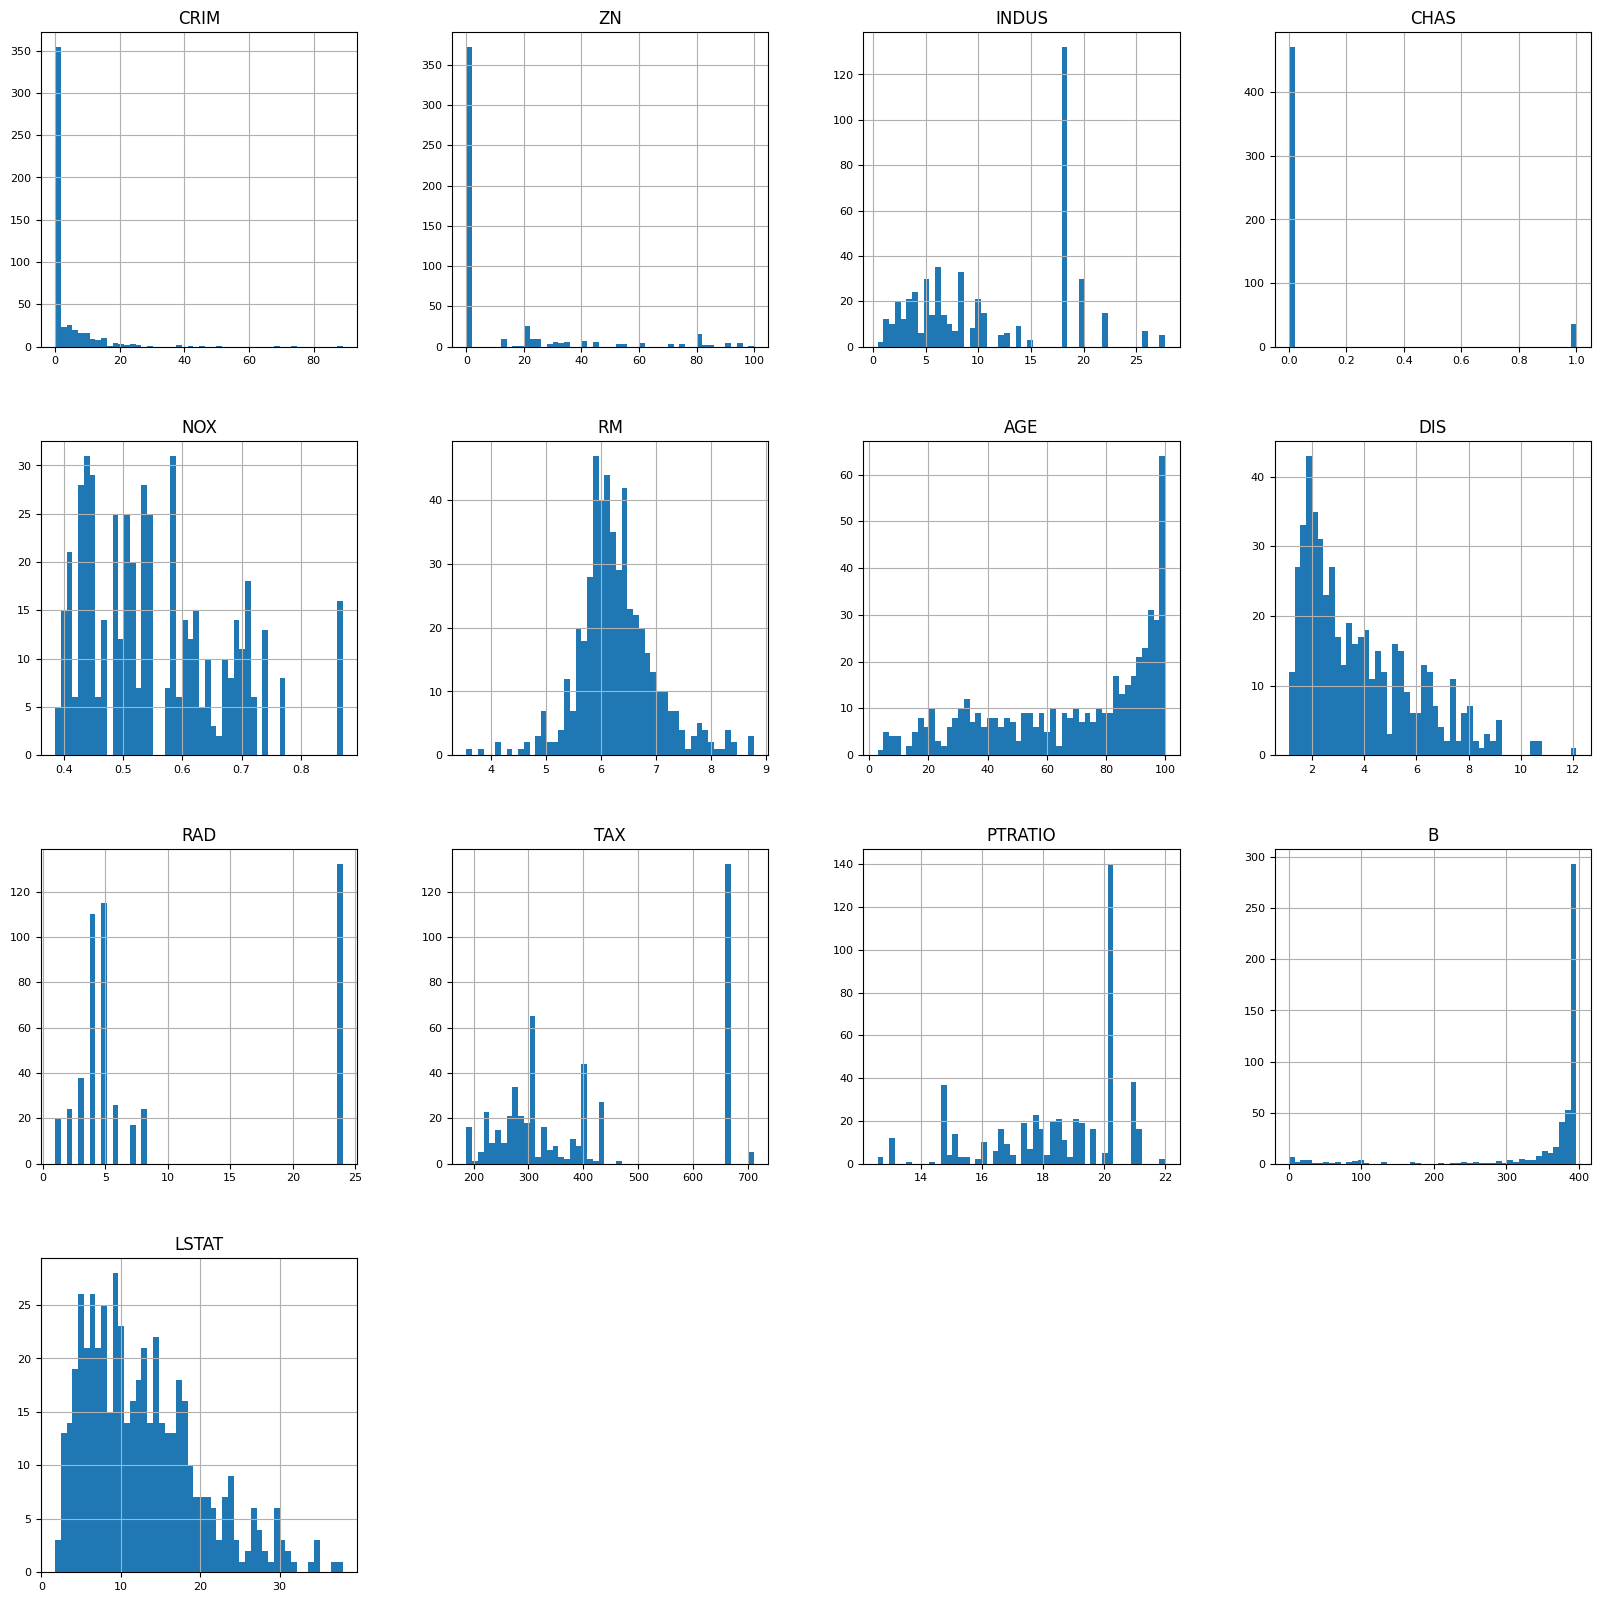

In [34]:
X.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8); # produces one histogram per feature

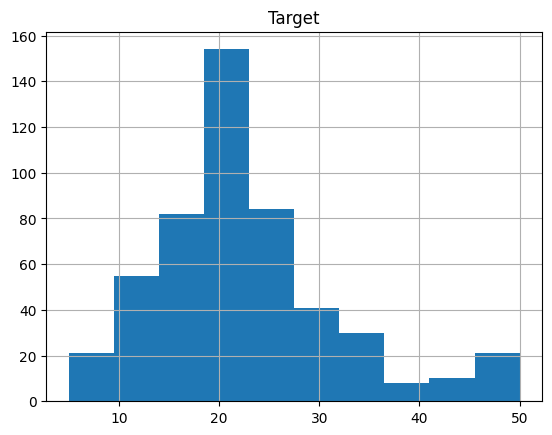

In [35]:
y.hist();

What insight did we gain, any suggestions?

Well, let's note a few potentially interesting observations about our data.
- many features display highly skewed distributions. Examples include `B`, `CRIM`, and `ZN`, and to lesser extent `AGE`.
- feature RM is the only feature that seems to be normally distributed. 
- our target variable looks quite normal. Good news. Linear regression likes normally distributed data.
- feature `CHAS` has only two values. It seems this is not a numeric but a categorical feature.
- the distribution of feature `RAD` suggests that this feature might better be translated into a categorical variable.
- ...

Observations like the above will inform your data preprocessing strategy. 

In addition to examining the distribution of one feature at a time, we can display a *heatmap* to check the pairwise correlation between features. Including the target variable in the analysis ensures that we also get an idea how strongly features are associated with the target.  Again, we are jumping a little ahead and this is on purpose. Remember that we will have a [full notebook dedicated to explanatory data analysis](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/4_nb_data_preparation.ipynb), in which we will detail these steps. For now, simply look at the plot and what it tells you. Ignore how the plot is produced, i.e., how to do the coding. 

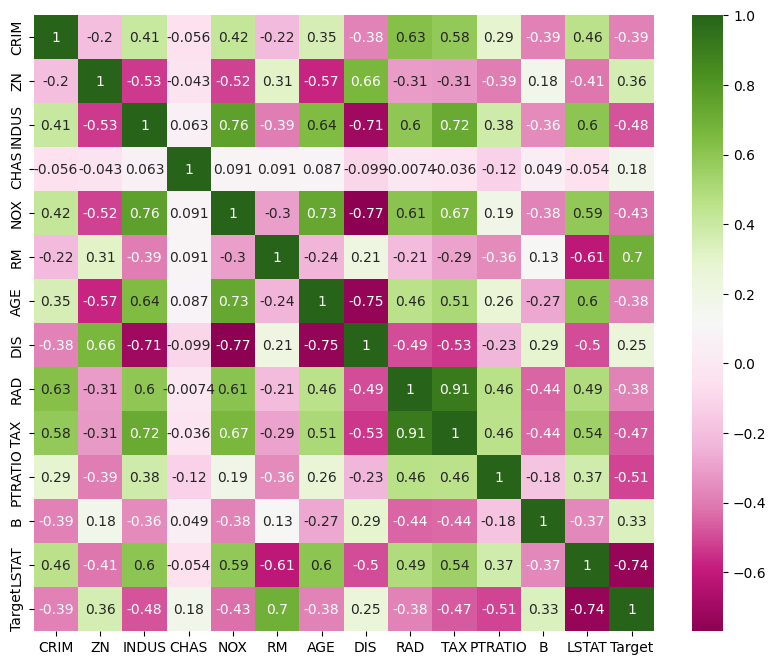

In [36]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

full_data = X.copy()

full_data["Target"] = y.copy()

corr = full_data.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="PiYG");

There are a few variables which have quite a high correlation with other variables. For example, `DIS` is highly correlated with `INDUS`, `NOX` and `AGE`. In the regression, we can check if all of these variables end up being significant and if not, we can refine our regression to remove variables that contribute little information to the prediction. Examining the last row of the matrix, we see that several variables display relatively strong correlation with our target variable, for example `RM` and `LSTAT`. Based on this result, we can expect our regression to explain a large part of the variance of the target. We might also expect that the can predict the target well from the features. Pad yourself on the shoulder if you understand the subtle but crucial difference between the two previous statements.  

### Calculate OLS coefficients

Now that we have taken a good look at the data and ensured that it is appropriate for regression modeling, we can estimate our regression function. The library `statsmodels` provides a lot of OLS tools and great visualizations for this task. By printing the `.summary()` method of the fit results, we can easily see all the details of the regression.

In [37]:
import statsmodels.api as sm

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:58:43   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
results.mse_resid  

24.803339271894526

You could spend a lot of time on discussing the results. First, note the warning messages at the end of the output. They should not come as a surprise. The correlation matrix revealed high feature-to-feature correlation or, put differently, **multicollinearity**.  We can also see that quite a few variables are insignificant such as `INDUS`, `AGE`, `NOX`, `TAX`, `RAD` and `CRIM`. This fits into the picture. Multicollinearity should render variables insignificant. Another 'to be expected' result is that we have a very high (adjusted) R-square. Finally, the mean square error is a common measure to compare algorithm's success and here it is just under 25. The value itself is maybe not so telling. But we can compare it to that of an alternative model. 

Let's try improve our regression. It is good practice to remove the insignificant  variables as they may yield misleading coefficients for other variables.  Note that variable `ZN` also becomes insignificant in the reduced model, so it has been removed as well in the below code.

In [39]:
features_tuned = ['CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']  # reduced set of features

model_tuned = sm.OLS(y, X[features_tuned])  # re-estimate regression

results_tuned = model_tuned.fit()

print(results_tuned.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1853.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:58:46   Log-Likelihood:                         -1537.2
No. Observations:                 506   AIC:                                      3086.
Df Residuals:                     500   BIC:                                      3112.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
results_tuned.mse_resid

25.790347283520116

Now we see that all variables are significant (i.e., p-values of 0.05 or below). Removing features has not changed R-square much. The average error is also not too much different in the new regression after removing some features. However, the F-stat is much higher in this regression. The F-stat in a regression is the chance that all regression coefficients are equal to zero if it is closer to 0. In other words, the model has no predictive capability. This all indicates that removing these variables may remove noise from our regression and yield better predictions. AIC and BIC figures also support this interpretation.

### Spliting the sample

In the previous examples, the OLS was optimized based on all available data. However, if we want to check if the inferred  relationship, that is the estimated regression function, would also hold for new data points and we assume those data points come from the same distribution, it can be useful to reserve some data points only for checking the model and not using them during model estimation. This concept is called the **train-test split**. Some data is reserved for calculating the optimal coefficients while the rest is used for testing the model on unseen data later.

In order to do this, let's first split the data into two random groups. One group will be called the *training data*, and the next the *test data*.

In [41]:
X_train = X.sample(frac=0.5, random_state=888)

y_train = y.iloc[X_train.index,:] # use the index of X_train to extract the corresponding y values

X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
212,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64


In [42]:
ix_test = X.index.difference(X_train.index)  # all elements of X but those included in X_Train 

X_test = X.iloc[ix_test, :] # using the inverse selector to get the test data

y_test = y.iloc[ix_test,:]

X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27


In [43]:
print(X_train.shape, X_test.shape) # check that the shapes match up with what is expected

(253, 13) (253, 13)


Now that we have split the data into two equally sized chunks, training and test data, we can fit a model with one set of the data. We will then use our model to predict on the training data and check the mean square error.

In [44]:
model_train = sm.OLS(y_train, X_train[features_tuned]) # train new model based on training data only

results_train = model_train.fit()

print(results_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1321.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                   1.48e-184
Time:                        17:58:49   Log-Likelihood:                         -732.17
No. Observations:                 253   AIC:                                      1476.
Df Residuals:                     247   BIC:                                      1498.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
results_train.mse_resid

19.57107517531428

We see that the mean square error of this data is much smaller than the previous mean square error. This could be the result of less samples for the coefficients to be drawn from which is causing some bias in the model. We can check if the MSE from the test data is closer to the original regression value of about 25.

In [46]:
results_test = results_train.predict(X_test[features_tuned])

print(results_test)

3      30.166969
6      23.627212
8      14.389877
9      21.359814
11     23.088648
         ...    
498    21.117740
499    17.465919
502    21.678068
503    28.376413
505    21.489231
Length: 253, dtype: float64


In [47]:
residuals_sq_test = (np.vstack(results_test) - y_test) ** 2

MSE_test = np.sum(residuals_sq_test) / X_test.shape[0]

print(MSE_test)

Target    33.230465
dtype: float64


We see that the mean square error in the test data is higher compared to that calculated on the entire sample of data. Note the pattern: training error < test error. That is typical in predictive modeling. Keep studying and you fully understand why; and if you are already there, well done ;)

## Data for classification 
The lecture has introduced two flavors of predictive modeling, regression and classification. So far, we have focused on regression. Recall that classification differs from regression in the scaling of the target variable. Regression assumes a numeric target variable, like sales, whereas classification assumes a discrete target. 

A surprisingly large number of real-life (business) problems can be framed as a two-class classification problem, as we will discuss intensively in the course. In fact, you have already seen a couple of examples in the introductory lecture sessions.  

Question: What is a good business example for a task that requires *multi-class* classification?

For simplicity, we consider this *two-class* or *binary* setting in the following. To facilitate plotting our data, we will further focus on a two-dimensional setting, meaning that each data points is characterized by two features or, if you prefer, (independent) variables. Assume you want to predict whether a machine is going to break in the next week. Break or do not break are the two possible states (i.e., classes). The features could then be the temperature of the machine and the time since when it has been running.


### Generating Data

For this exercise we will generate our own (synthetic) data, to better understand what classification models are doing. To create synthetic data, you will use routines for random number generation. To ensure that you get the same result when you run your code multiple times, you should first fix the seed of the random number generator. We have already created a *code* cell below, which you can now edit to fix the seed.

In [48]:
# set random seed, such that every run yields the same sequence of random numbers
np.random.seed(888)

We want to generate a data set for binary classification. This means that each synthetic data point belongs to one out of two classes. Hence, we have to store three values for each data point, one for the class label (class 1 or class 2) and one value for each of the two features. 

In this task, we assume that the data of each class comes from a multivariate normal distribution. We use the different functions within `numpy.random` to generate normally distributed data. Note that we need two normals with different parameters; one set of parameters for class 1 and another set of parameters for class 2. You can play with the parameters to create data in which the separation of the two classes is easier or harder. 

As in the regression example, we need data for both, the features $X$ and the target $y$. Let's start with the features.

In [49]:
n = 1000  # Let's set one variable to store the number of data points we want to generate per class

class1_x1 = np.random.normal(loc=1, scale=1, size=n)  # this is class 1 feature 1
class1_x2 = np.random.normal(loc=1, scale=1, size=n)  # this is class 1 feature 2

class2_x1 = np.random.normal(loc=4, scale=1, size=n)  # and we need the same type of data for class 2
class2_x2 = np.random.normal(loc=4, scale=1, size=n)  # but note that we set a different value for the location parameter 

Above, we created data representing the independent variables or features. In case you wonder, more elegant and more concise ways of coding data generation exist. We hope our implementation is very clear. We create the random - normally distributed  - values for feature 1 and feature 2 separately. This way, we *implicitly* create synthetic data from a two-dimensional Gaussian distribution.  


Having our data for the feature matrix $X$, we next create arrays for storing the values of the target variable. That is actually very easy. We simply state that all data points, which stem from the first Gaussian belong to class 1, whereas all other data points, which come from the second Gaussian, belong to class 2. 

In [50]:
y1 = np.repeat(0, n)
y2 = np.repeat(1, n)

Ok, almost done. Up until here, we have all the data that we need but it is stored in different arrays. This would complicate our coding. To use libraries like `sklearn`, we would also need to transform our data and put it into the standard format of one matrix for feature values $X$ with dimensionality $n \times 2$ and one array of length $n$ storing the class labels. The below code exemplifies one approach to transform our data accordingly. Make sure to 'debug' the code by, for example, examining the shapes of the arrays, so that you fully understand the transformation.

In [51]:
class1 = np.vstack((class1_x1, class1_x2)).T
class2 = np.vstack((class2_x1, class2_x2)).T

data = np.vstack((class1,class2))
labels = np.concatenate((y1,y2))

data[:5,:]

array([[ 0.82379913,  0.52703441],
       [ 1.18887636,  0.46382642],
       [ 1.82674718,  0.36148983],
       [ 0.96755269, -0.40695666],
       [ 0.34750058,  1.73195855]])

In [52]:
labels[:5], labels[-5:]  # labels of the first and last five data points

(array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1]))

In [53]:
data.shape, labels.shape

((2000, 2), (2000,))

#### Mini exercise:
Check the documentation of the function `np.random.multivariate_normal()`. Use that function to re-implement the above data generation code in a more elegant way.

In [54]:
# Your solution goes here:


Once we have created our data, we plot it by means of a scatter plot. The function `scatter`, which the library `matplotlib` provides does the job. Note how we make use of our class labels to color the graph. 
Do not forget to alter the parameters of your two normal distributions and examine how changing the parameters make the two classes easier or harder to distinguish.
  

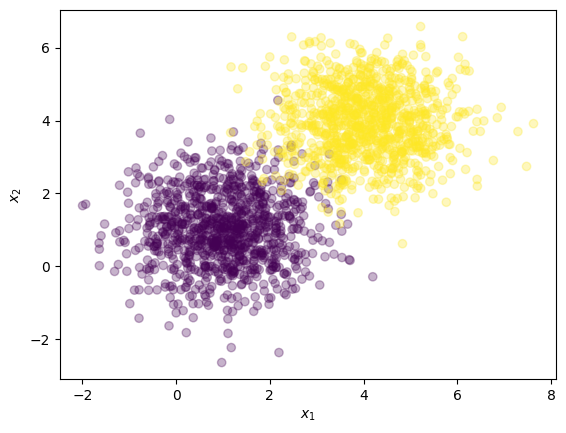

In [55]:
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

The picture nicely illustrates our classification problem. A classifier could solve this problem. To that end, the classifier would create a function that - somehow - separates the yellow from the purple points; in other words distinguishes examples from one class from examples of the other class. Many classification models exist, and you will get to know several of them in  BADS.  To just illustrate how the picture looks like if adding a classifier, we apply **logistic regression** below.  We discuss logistic regression in detail in Chapter 5 of the course. For now, you can simply consider it the counterpart to ordinary linear regression that you want to use whenever you face a classification problem. No need to study the codes. Just enjoy the picture. 

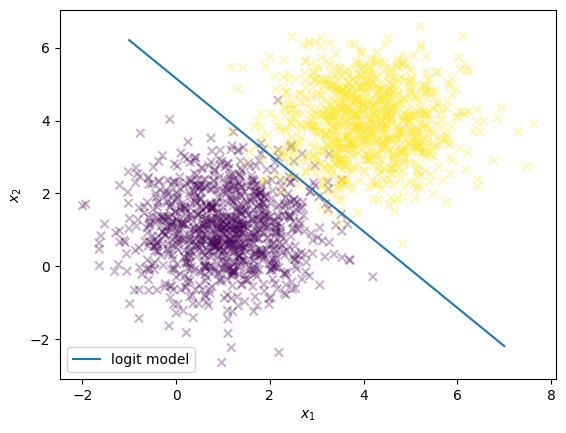

In [56]:
 # Code to run logistic regression and output resulting model using statsmodel library
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', fit_intercept=True)
model.fit(data, labels)

# Write code to create a two-dimensional plot of the data and how the logistic regression separates the two classes
w = model.coef_[0]
xx = np.linspace(-1,7)

a = -w[0] / w[1]
b = -model.intercept_[0] / w[1]

yy = a * xx + b

fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3, marker='x')
plt.plot(xx,yy, label="logit model")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc='best');

## Synthetic data generation in sklearn

To complete this demo notebook, let's look at some more option to generate synthetic data. The ability to plot data is often very helpful, and this is where synthetic data comes in handy. `sklearn` offers quite a few options for generating synthetic data. You can check out all of the options [here](https://scikit-learn.org/stable/modules/classes.html#samples-generator). We will quickly review the functionality for some of the more important functions:

*   `make_blobs`
*   `make_regression`
*   `make_classication`

It is highly recommended to take a look at [this post](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922), which does a great job at illustrating the differences of each data generation function.

In [57]:
from sklearn.datasets import make_blobs, make_regression, make_classification

### make_blobs
Remember that we used this function before in [Demo Notebook 2](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/2_nb_descriptive_analytics.ipynb). Well, some repetition does not hurt so let's see again how it works. 
The function `make_blobs` creates data points centered around centroids in an n-dimensional space, which can be distinguished with a linear classifier. You can decide on the number of features (i.e., dimensionality of the space) and play with other options to increase the number of centroids/classes (`n_class`), their distance from each other (`class_sep`) and a select a `random_state` for reproducibility. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) for more settings.

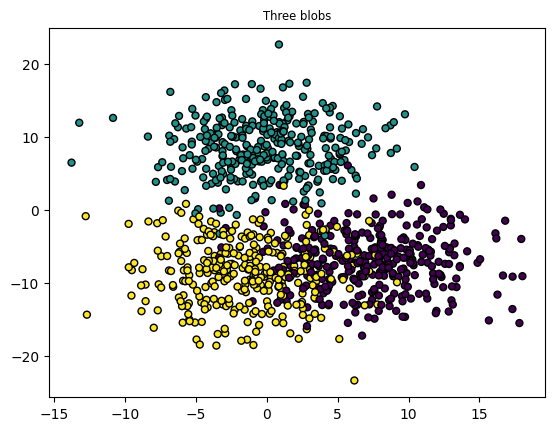

In [58]:
plt.title("Three blobs", fontsize='small')
X_blob, y_blob = make_blobs(n_samples=1000, n_features=2, cluster_std=4.0, random_state=888)
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='o', c= y_blob, s=25, edgecolor='k'); # feature 1 on x, feature 2 on y and color by target

### make_classification

The function `make_classification` initially creates clusters of normally distributed points and assigns an equal number of clusters to each class. Afterwards, interdependence in features and various types of noise are added. You can add informative, redundant and repeated features with `n_informative` , `n_redundant` and `n_repeated` respectively. Like the previous function, the number of classes can be adjusted using `n_class` and their distance from one another can be adjusted using `class_sep`. Reproducibility is again controlled by `random_state`. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) for more settings.

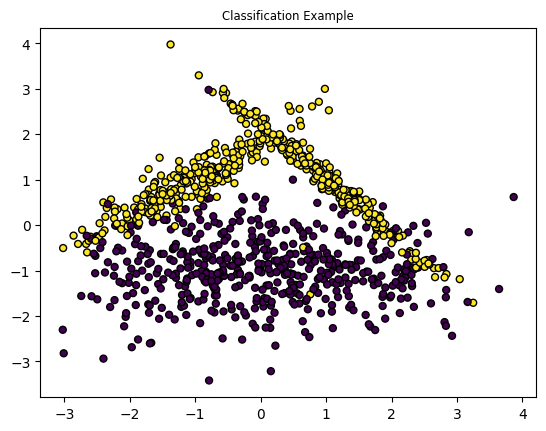

In [59]:
plt.title("Classification Example", fontsize='small')
X_class, y_class = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=888)
plt.scatter(X_class[:, 0], X_class[:, 1], marker='o', c=y_class, s=25, edgecolor='k'); # feature 1 on x, feature 2 on y and color by target

Provided you did not change our demo code, you will see a situation in which a linear classifier could no longer separate the data well. More precisely, the true relationship between the feature values and the class labels is nonlinear and, therefore, a linear classifier cannot produce a *good* separation of the data. 

Looking at the data, however, a quadratic classifier should be able to solve the classification problem. It is a bit too early to test this hypothesis, but feel very free to give it a try if you feel up for the task ;) 

### make_regression

The function `make_classification` initially creates clusters of normally distributed points and assigns an equal number of clusters to each class. Afterwards, interdependence in features and various types of noise are added. You can add informative, redundant and repeated features with `n_informative` , `n_redundant` and `n_repeated` respectively. The [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) gives more clarity on the other possible settings.

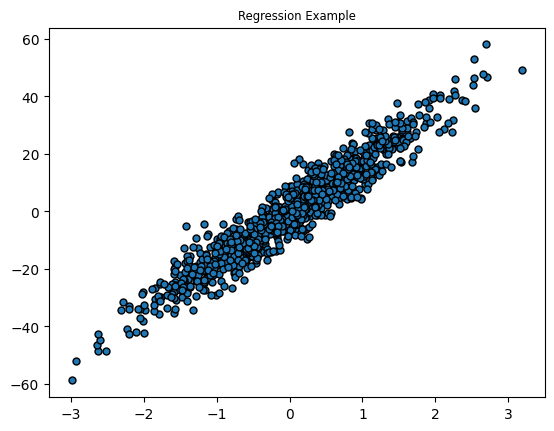

In [60]:
plt.title("Regression Example", fontsize='small')
X_reg, y_reg = make_regression(n_samples=1000, n_features=1, noise=5.0, random_state=888)
plt.scatter(X_reg, y_reg, marker='o', s=25, edgecolor='k'); # note that here we've plotted feature and target directly rather than feature 1 and feature 2

# Summary
That's the end of today, another demo notebook completed. *Well Done!*

We not actually spend so much time on prediction but concentrated on basic methods like linear regression, which can be used for prediction. And, importantly, we have spent a lot of time on the data that we need for prediction. Data with features and a target variable. Having experienced how such data really looks and how you can create it yourself will help you a lot on your data science journey. 

Next up, we continue with elaborating on data handling and readying data for modeling. See you soon in [Demo Notebook 4](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/4_nb_data_preparation.ipynb).